In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
matplotlib.rcParams['axes.unicode_minus']=False

In [42]:
df=pd.read_csv("C:/Users/홍사빈/Desktop/　/학교/랩실/Backend/Project/Project1/files/result_data.csv", encoding="cp949")

In [43]:
df['접수일(년월일)'] = pd.to_datetime(df['접수일(년월일)'])
df['연도'] = df['접수일(년월일)'].dt.year

# 필터링 조건 설정
years = [2019, 2020, 2021, 2022, 2023]
categories = ['헬스장']
filtered_df = df[(df['연도'].isin(years)) & (df['물품소분류'].isin(categories))]

# 연도별 '헬스장' 불만건수 계산
healthclub_complains = filtered_df.groupby('연도')['물품소분류'].count().reset_index()
healthclub_complains.rename(columns={'물품소분류': '헬스장_불만건수'}, inplace=True)

healthclub_complains

,연도,헬스장_불만건수
0,2020,1821
1,2021,2402
2,2022,2637
3,2023,593


,연도,헬스장_불만건수
0,2020,1821
1,2021,2402
2,2022,2637
3,2023,593


In [44]:
df['접수일(년월일)'] = pd.to_datetime(df['접수일(년월일)'])
df['연도'] = df['접수일(년월일)'].dt.year

# 필터링 조건 설정
years = [2019, 2020, 2021, 2022, 2023]
categories = ['유사투자자문']
filtered_df = df[(df['연도'].isin(years)) & (df['물품소분류'].isin(categories))]


investment_complains = filtered_df.groupby('연도')['물품소분류'].count().reset_index()
investment_complains.rename(columns={'물품소분류': '유사투자자문_불만건수'}, inplace=True)

investment_complains

,연도,유사투자자문_불만건수
0,2020,13
1,2021,5527
2,2022,2937
3,2023,181


,연도,유사투자자문_불만건수
0,2020,13
1,2021,5527
2,2022,2937
3,2023,181


In [45]:
df['접수일(년월일)'] = pd.to_datetime(df['접수일(년월일)'])
df['연도'] = df['접수일(년월일)'].dt.year

# 필터링 조건 설정
years = [2019, 2020, 2021, 2022, 2023]
categories = ['항공여객운송서비스']
filtered_df = df[(df['연도'].isin(years)) & (df['물품소분류'].isin(categories))]

flight_complains = filtered_df.groupby('연도')['물품소분류'].count().reset_index()
flight_complains.rename(columns={'물품소분류': '항공여객운송서비스_불만건수'}, inplace=True)

flight_complains

,연도,항공여객운송서비스_불만건수
0,2019,190
1,2020,2759
2,2021,485
3,2022,1122
4,2023,321


,연도,항공여객운송서비스_불만건수
0,2019,190
1,2020,2759
2,2021,485
3,2022,1122
4,2023,321


In [46]:
df1=investment_complains
df2=healthclub_complains
df3=flight_complains

In [47]:
df1.head()

,연도,유사투자자문_불만건수
0,2020,13
1,2021,5527
2,2022,2937
3,2023,181


,연도,유사투자자문_불만건수
0,2020,13
1,2021,5527
2,2022,2937
3,2023,181


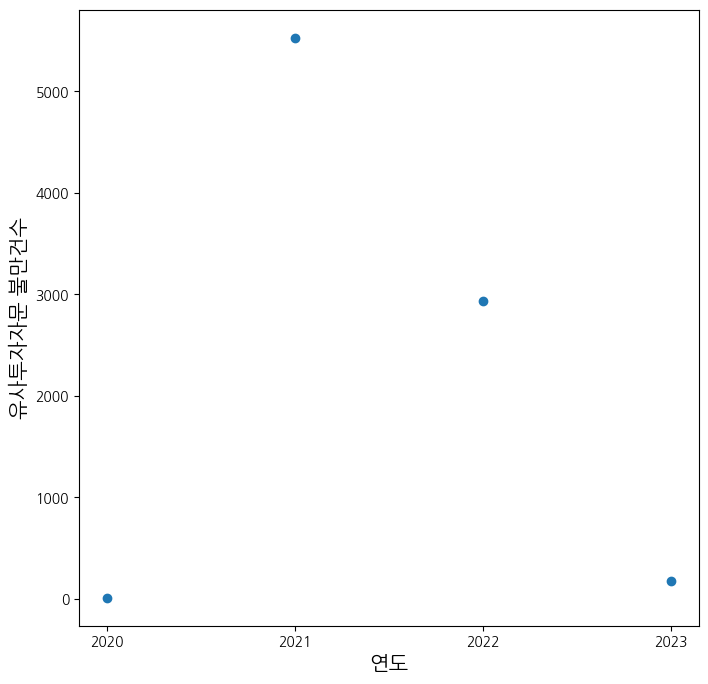

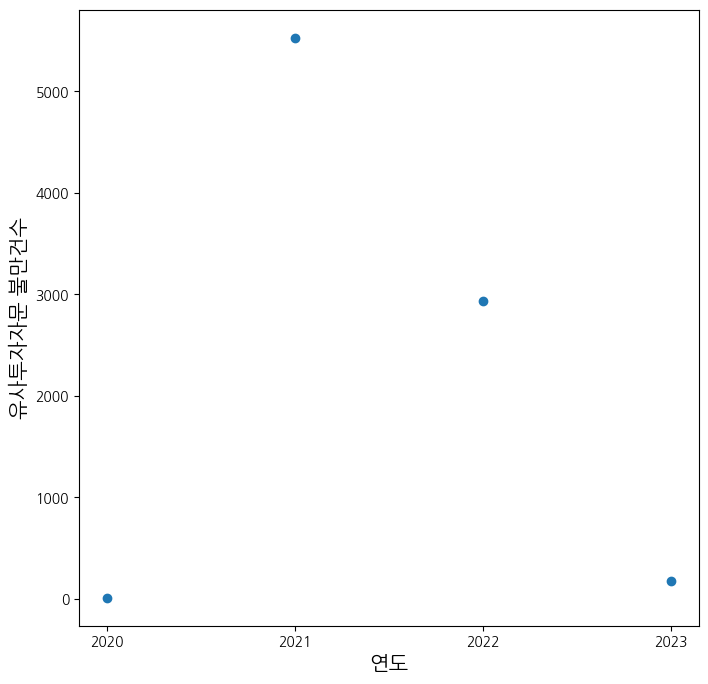

In [48]:
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/NanumGothic.ttf'

fontprop = fm.FontProperties(fname=font_path)
plt.rc('font', family=fontprop.get_name())

fig=plt.figure(figsize=(8, 8))
fig.set_facecolor('white')

font_size=15
plt.scatter(df1['연도'], df1['유사투자자문_불만건수'])

plt.xlabel('연도', fontsize=font_size)
plt.ylabel('유사투자자문 불만건수', fontsize=font_size)
plt.xticks(df1['연도'], df1['연도'].astype(int))
plt.show()

In [49]:
fit1 = ols('유사투자자문_불만건수 ~ 연도', data=df1).fit()

In [50]:
fit1.summary()

C:\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            유사투자자문_불만건수   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.484
Method:                 Least Squares   F-statistic:                   0.02149
Date:                Fri, 11 Aug 2023   Prob (F-statistic):              0.897
Time:                        14:39:41   Log-Likelihood:                -36.550
No. Observations:                   4   AIC:                             77.10
Df Residuals:                       2   BIC:                             75.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.238e+05   2.88e+06      0.147      0.896    -1.2e+07    1.28e+07
연도          -208.6000   1422.983     -0.147      0.897   -6331.203    5914.003
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.218
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.433
Skew:                           0.343   Prob(JB):                        0.805
Kurtosis:                       1.541   Cond. No.                     3.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            유사투자자문_불만건수   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.484
Method:                 Least Squares   F-statistic:                   0.02149
Date:                Fri, 11 Aug 2023   Prob (F-statistic):              0.897
Time:                        14:39:41   Log-Likelihood:                -36.550
No. Observations:                   4   AIC:                             77.10
Df Residuals:                       2   BIC:                             75.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.238e+05   2.88e+06      0.147      0.896    -1.2e+07    1.28e+07
연도          -208.6000   1422.983     -0.147      0.897   -6331.203    5914.003
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.218
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.433
Skew:                           0.343   Prob(JB):                        0.805
Kurtosis:                       1.541   Cond. No.                     3.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
fit1.params.Intercept

423849.399999748

423849.399999748

In [52]:
fit1.params.연도

-208.5999999998753

-208.5999999998753

In [53]:
fit1.fittedvalues

0    2477.4
1    2268.8
2    2060.2
3    1851.6
dtype: float64

0    2477.4
1    2268.8
2    2060.2
3    1851.6
dtype: float64

In [54]:
fit1.resid

0   -2464.4
1    3258.2
2     876.8
3   -1670.6
dtype: float64

0   -2464.4
1    3258.2
2     876.8
3   -1670.6
dtype: float64

In [55]:
fit1.predict(exog=dict(연도=[2019]))

0    2686.0
dtype: float64

0    2686.0
dtype: float64

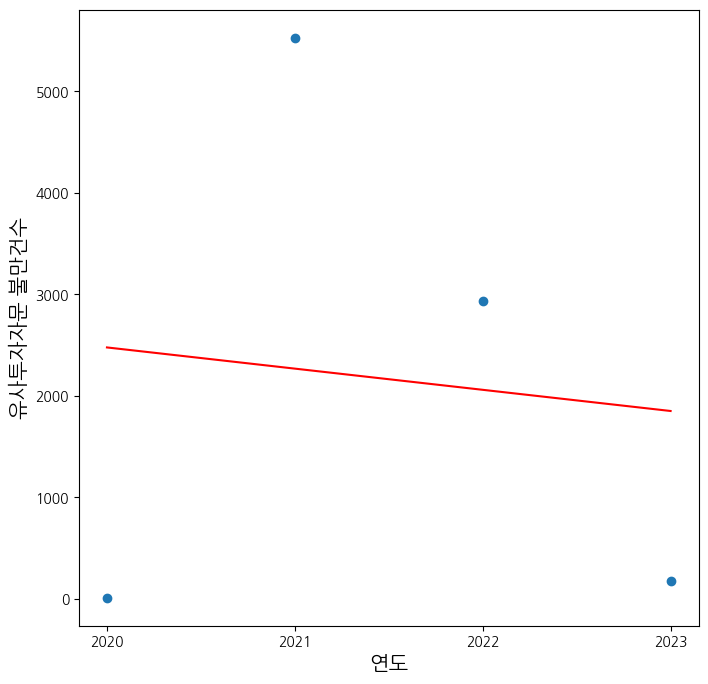

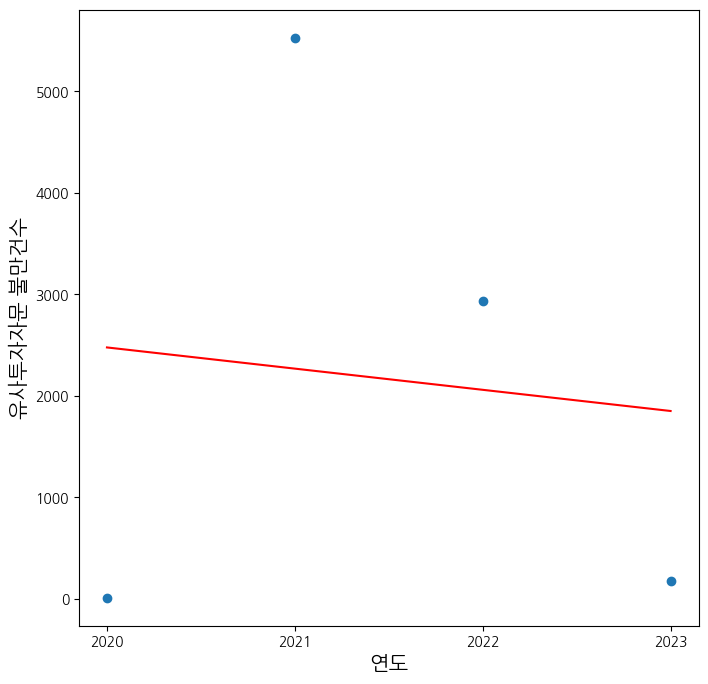

In [56]:
fig=plt.figure(figsize=(8, 8))
fig.set_facecolor('white')

font_size=15
plt.scatter(df1['연도'], df1['유사투자자문_불만건수'])
plt.plot(df1['연도'], fit1.fittedvalues, color='red')

plt.xlabel('연도', fontsize=font_size)
plt.ylabel('유사투자자문 불만건수', fontsize=font_size)
plt.xticks(df1['연도'], df1['연도'].astype(int))

plt.show()

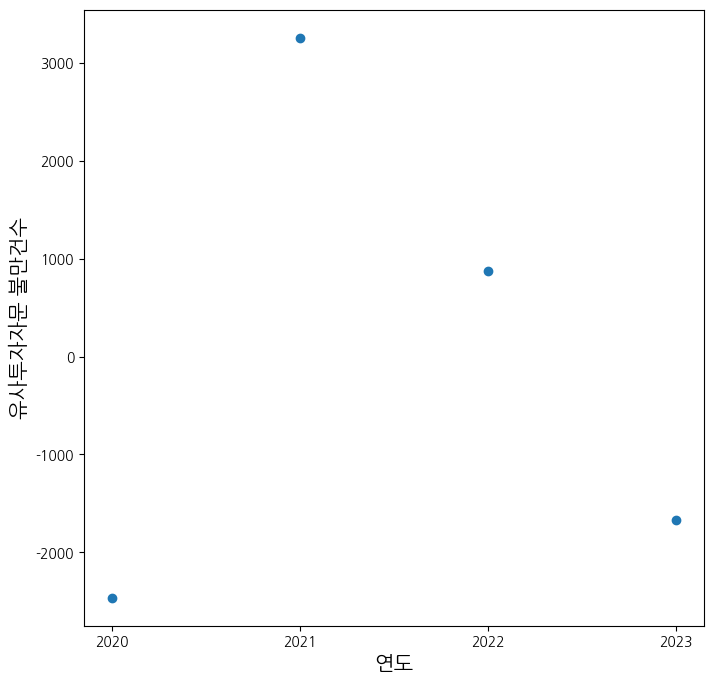

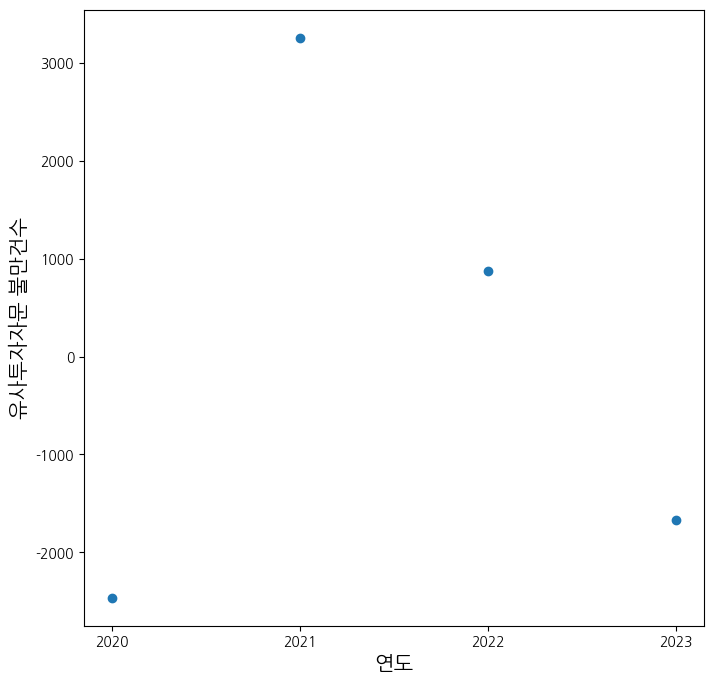

In [57]:
fig=plt.figure(figsize=(8, 8))
fig.set_facecolor('white')

font_size=15

plt.scatter(df1['연도'], fit1.resid)

plt.xlabel('연도', fontsize=font_size)
plt.ylabel('유사투자자문 불만건수', fontsize=font_size)
plt.xticks(df1['연도'], df1['연도'].astype(int))

plt.show()

In [58]:
df2.head()

,연도,헬스장_불만건수
0,2020,1821
1,2021,2402
2,2022,2637
3,2023,593


,연도,헬스장_불만건수
0,2020,1821
1,2021,2402
2,2022,2637
3,2023,593


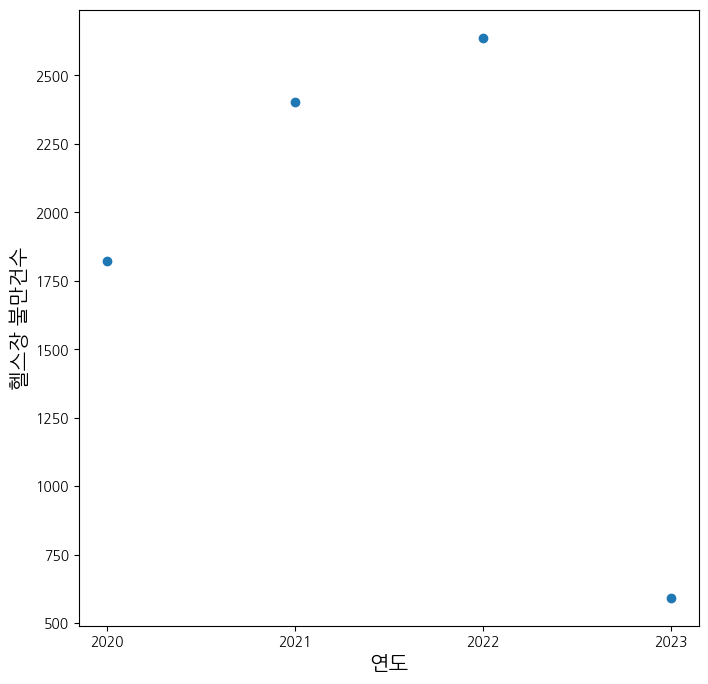

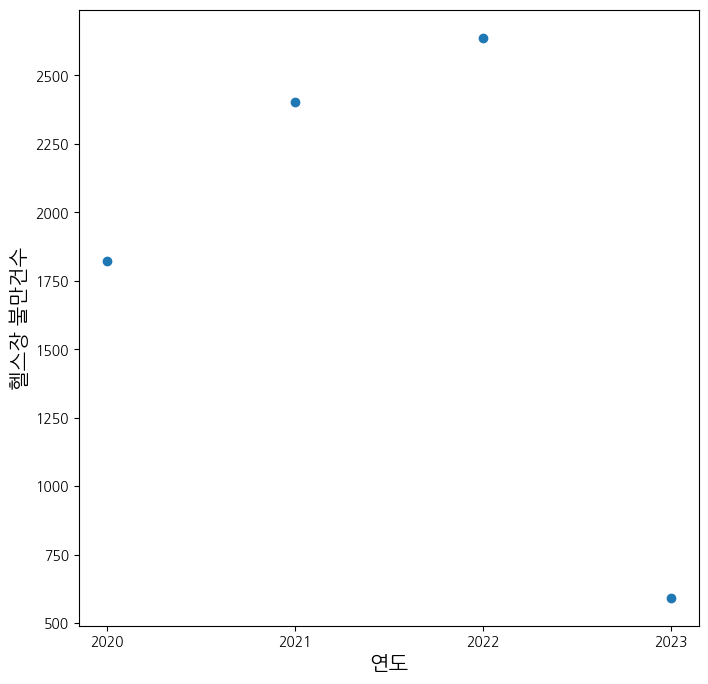

In [59]:
fig=plt.figure(figsize=(8, 8))
fig.set_facecolor('white')

font_size=15
plt.scatter(df2['연도'], df2['헬스장_불만건수'])

plt.xlabel('연도', fontsize=font_size)
plt.ylabel('헬스장 불만건수', fontsize=font_size)
plt.xticks(df2['연도'], df2['연도'].astype(int))

plt.show()

In [60]:
fit2=ols('헬스장_불만건수 ~ 연도', data=df2).fit()

In [61]:
fit2.summary()

C:\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               헬스장_불만건수   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                 -0.144
Method:                 Least Squares   F-statistic:                    0.6230
Date:                Fri, 11 Aug 2023   Prob (F-statistic):              0.513
Time:                        14:39:43   Log-Likelihood:                -31.828
No. Observations:                   4   AIC:                             67.66
Df Residuals:                       2   BIC:                             66.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.991e+05   8.83e+05      0.791      0.512    -3.1e+06     4.5e+06
연도          -344.9000    436.976     -0.789      0.513   -2225.056    1535.256
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.137
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.482
Skew:                           0.223   Prob(JB):                        0.786
Kurtosis:                       1.359   Cond. No.                     3.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               헬스장_불만건수   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                 -0.144
Method:                 Least Squares   F-statistic:                    0.6230
Date:                Fri, 11 Aug 2023   Prob (F-statistic):              0.513
Time:                        14:39:43   Log-Likelihood:                -31.828
No. Observations:                   4   AIC:                             67.66
Df Residuals:                       2   BIC:                             66.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.991e+05   8.83e+05      0.791      0.512    -3.1e+06     4.5e+06
연도          -344.9000    436.976     -0.789      0.513   -2225.056    1535.256
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.137
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.482
Skew:                           0.223   Prob(JB):                        0.786
Kurtosis:                       1.359   Cond. No.                     3.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
fit2.params.Intercept

699078.5999999018

699078.5999999018

In [63]:
fit2.params.연도

-344.89999999995155

-344.89999999995155

In [64]:
fit2.fittedvalues

0    2380.6
1    2035.7
2    1690.8
3    1345.9
dtype: float64

0    2380.6
1    2035.7
2    1690.8
3    1345.9
dtype: float64

In [65]:
fit2.resid

0   -559.6
1    366.3
2    946.2
3   -752.9
dtype: float64

0   -559.6
1    366.3
2    946.2
3   -752.9
dtype: float64

In [66]:
fit2.predict(exog=dict(연도=[2019]))

0    2725.5
dtype: float64

0    2725.5
dtype: float64

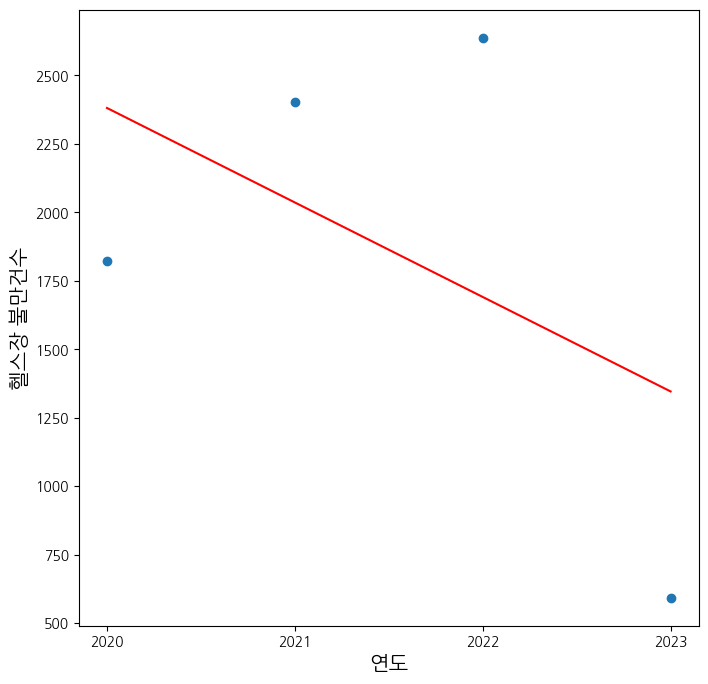

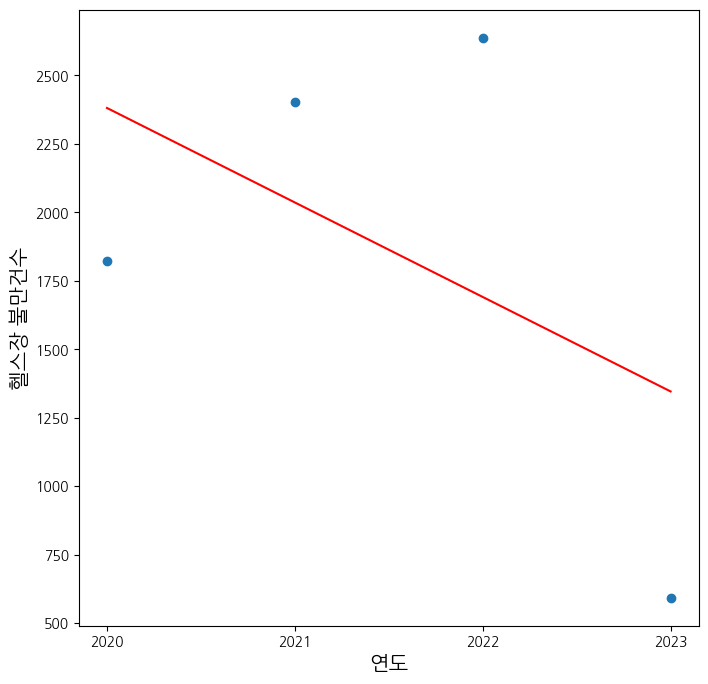

In [67]:
fig=plt.figure(figsize=(8, 8))
fig.set_facecolor('white')

font_size=15
plt.scatter(df2['연도'], df2['헬스장_불만건수'])
plt.plot(df2['연도'], fit2.fittedvalues, color='red')

plt.xlabel('연도', fontsize=font_size)
plt.ylabel('헬스장 불만건수', fontsize=font_size)
plt.xticks(df2['연도'], df2['연도'].astype(int))

plt.show()

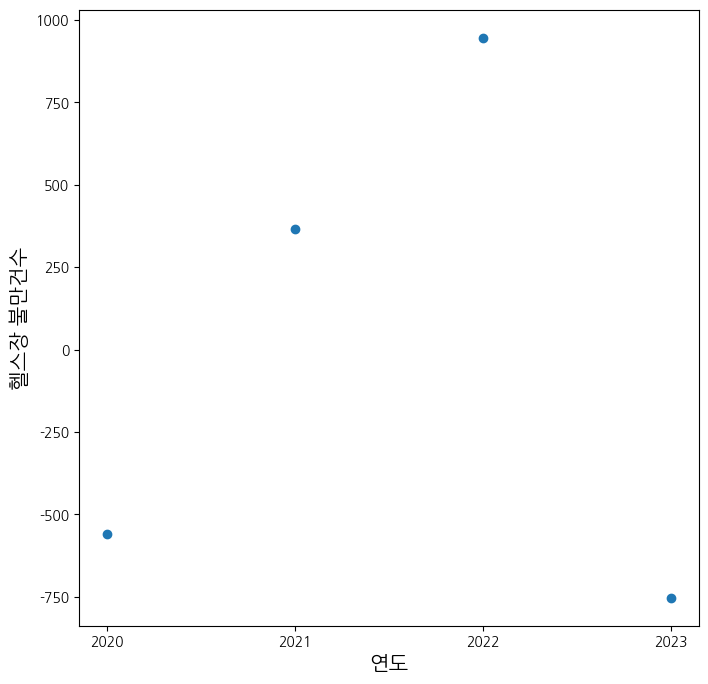

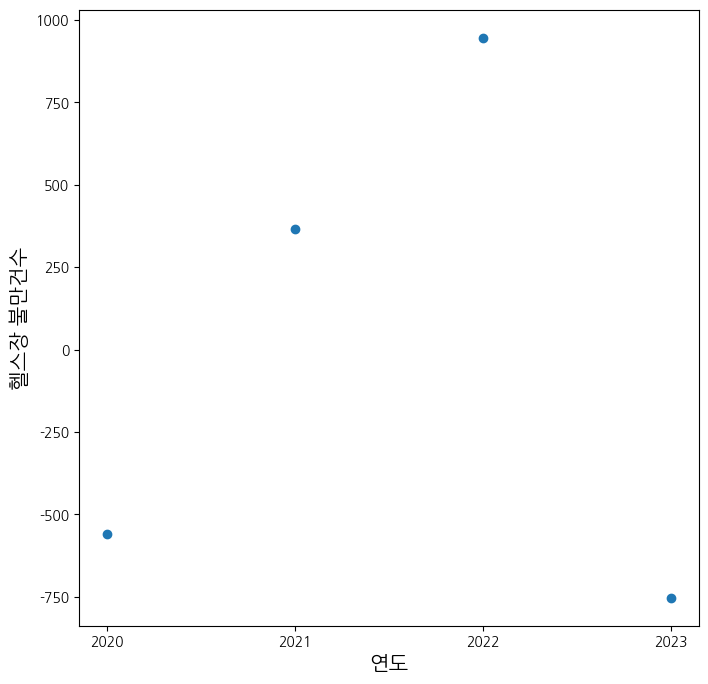

In [68]:
fig=plt.figure(figsize=(8, 8))
fig.set_facecolor('white')

font_size=15

plt.scatter(df2['연도'], fit2.resid)

plt.xlabel('연도', fontsize=font_size)
plt.ylabel('헬스장 불만건수', fontsize=font_size)
plt.xticks(df2['연도'], df2['연도'].astype(int))

plt.show()

In [69]:
df3.head()

,연도,항공여객운송서비스_불만건수
0,2019,190
1,2020,2759
2,2021,485
3,2022,1122
4,2023,321


,연도,항공여객운송서비스_불만건수
0,2019,190
1,2020,2759
2,2021,485
3,2022,1122
4,2023,321


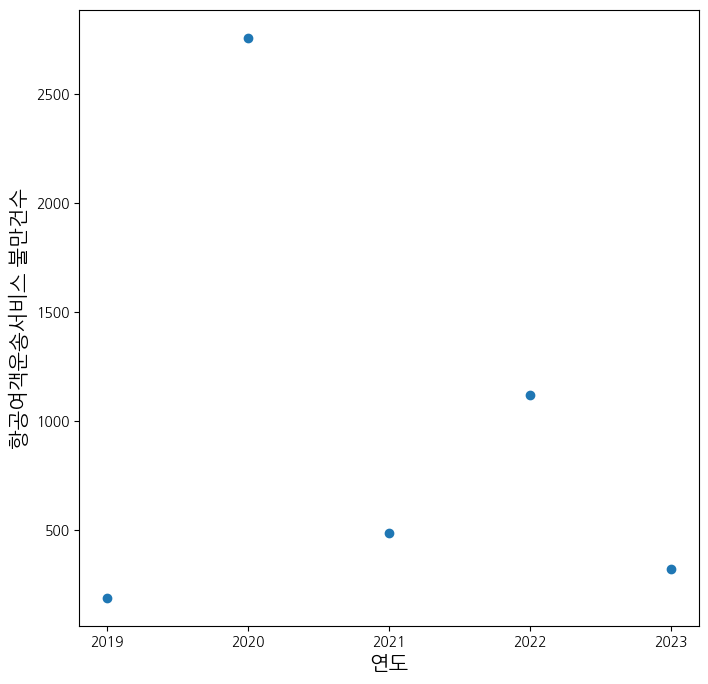

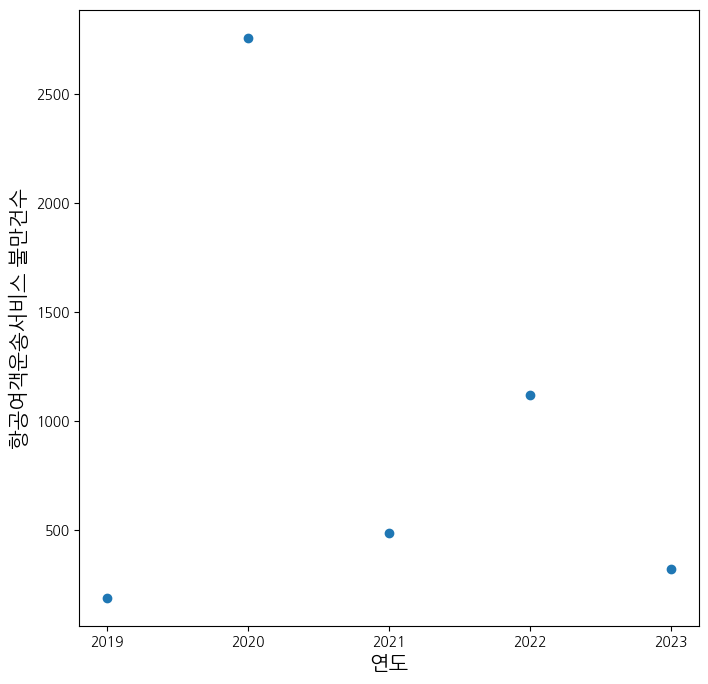

In [70]:
fig=plt.figure(figsize=(8, 8))
fig.set_facecolor('white')

font_size=15
plt.scatter(df3['연도'], df3['항공여객운송서비스_불만건수'])

plt.xlabel('연도', fontsize=font_size)
plt.ylabel('항공여객운송서비스 불만건수', fontsize=font_size)
plt.xticks(df3['연도'], df3['연도'].astype(int))

plt.show()

In [71]:
fit3=ols('항공여객운송서비스_불만건수 ~ 연도', data=df3).fit()

In [72]:
fit3.summary()

C:\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         항공여객운송서비스_불만건수   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.277
Method:                 Least Squares   F-statistic:                    0.1319
Date:                Fri, 11 Aug 2023   Prob (F-statistic):              0.741
Time:                        14:39:44   Log-Likelihood:                -41.256
No. Observations:                   5   AIC:                             86.51
Df Residuals:                       3   BIC:                             85.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.789e+05   7.65e+05      0.364      0.740   -2.16e+06    2.71e+06
연도          -137.5000    378.561     -0.363      0.741   -1342.249    1067.249
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.007
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.598
Skew:                           0.782   Prob(JB):                        0.742
Kurtosis:                       2.351   Cond. No.                     2.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         항공여객운송서비스_불만건수   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.277
Method:                 Least Squares   F-statistic:                    0.1319
Date:                Fri, 11 Aug 2023   Prob (F-statistic):              0.741
Time:                        14:39:44   Log-Likelihood:                -41.256
No. Observations:                   5   AIC:                             86.51
Df Residuals:                       3   BIC:                             85.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.789e+05   7.65e+05      0.364      0.740   -2.16e+06    2.71e+06
연도          -137.5000    378.561     -0.363      0.741   -1342.249    1067.249
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.007
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.598
Skew:                           0.782   Prob(JB):                        0.742
Kurtosis:                       2.351   Cond. No.                     2.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
fit3.params.Intercept

278862.90000005055

278862.90000005055

In [74]:
fit3.params.연도

-137.500000000025

-137.500000000025

In [75]:
fit3.fittedvalues

0    1250.4
1    1112.9
2     975.4
3     837.9
4     700.4
dtype: float64

0    1250.4
1    1112.9
2     975.4
3     837.9
4     700.4
dtype: float64

In [76]:
fit3.resid

0   -1060.4
1    1646.1
2    -490.4
3     284.1
4    -379.4
dtype: float64

0   -1060.4
1    1646.1
2    -490.4
3     284.1
4    -379.4
dtype: float64

In [77]:
fit3.predict(exog=dict(연도=[2024]))

0    562.9
dtype: float64

0    562.9
dtype: float64

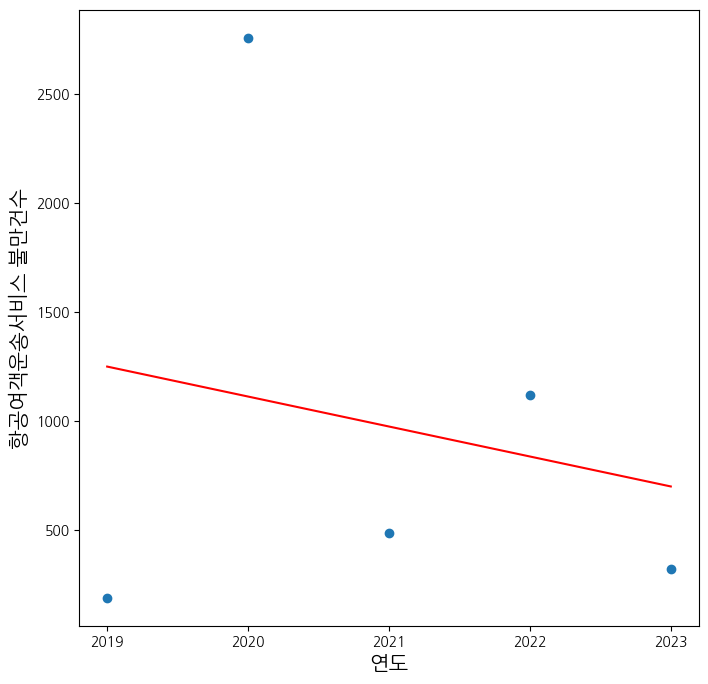

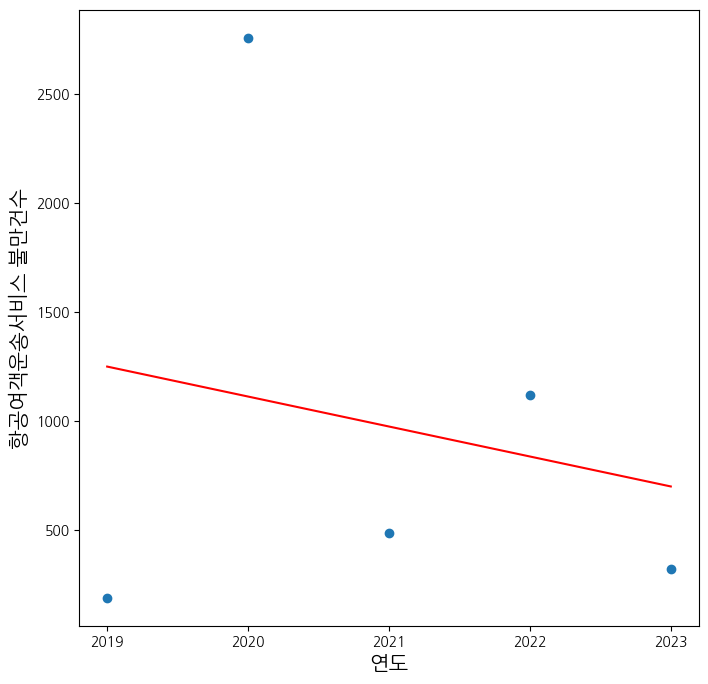

In [78]:
fig=plt.figure(figsize=(8, 8))
fig.set_facecolor('white')

font_size=15
plt.scatter(df3['연도'], df3['항공여객운송서비스_불만건수'])
plt.plot(df3['연도'], fit3.fittedvalues, color='red')

plt.xlabel('연도', fontsize=font_size)
plt.ylabel('항공여객운송서비스 불만건수', fontsize=font_size)
plt.xticks(df3['연도'], df3['연도'].astype(int))

plt.show()

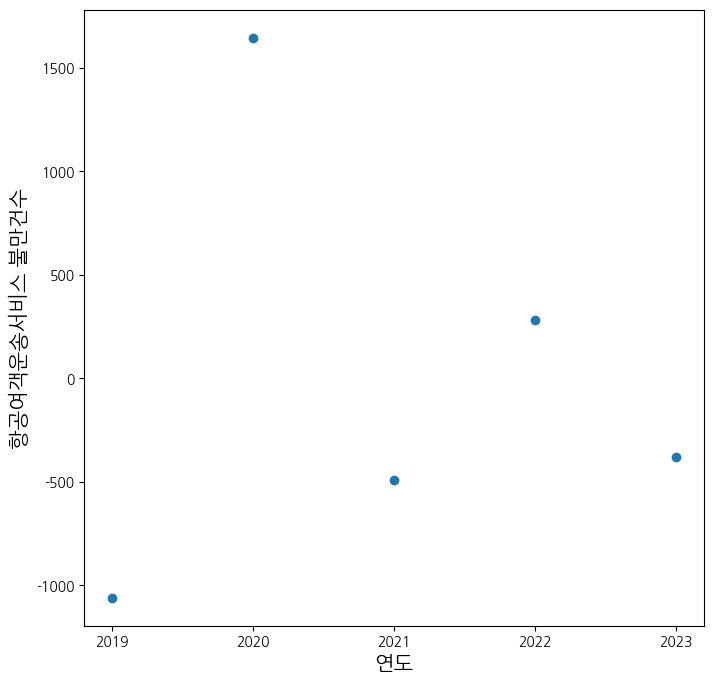

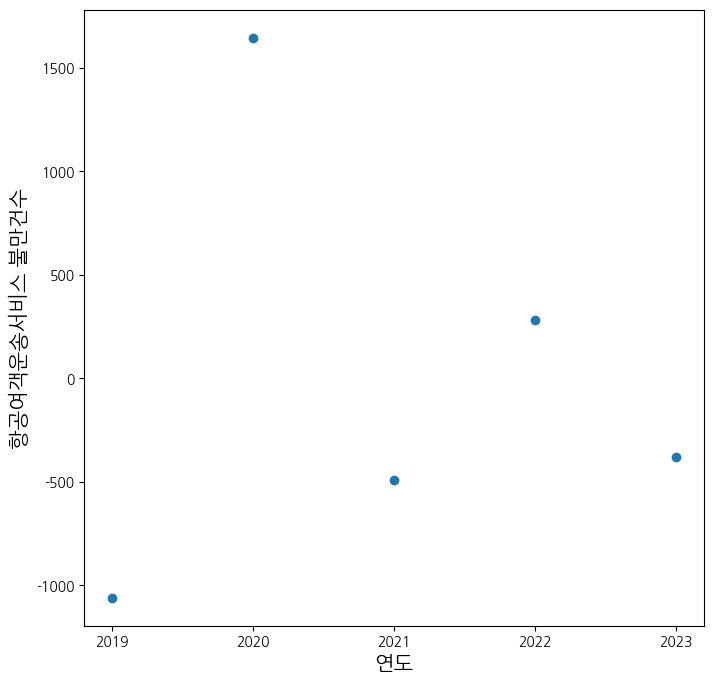

In [79]:
fig=plt.figure(figsize=(8, 8))
fig.set_facecolor('white')

font_size=15

plt.scatter(df3['연도'], fit3.resid)

plt.xlabel('연도', fontsize=font_size)
plt.ylabel('항공여객운송서비스 불만건수', fontsize=font_size)
plt.xticks(df3['연도'], df3['연도'].astype(int))

plt.show()

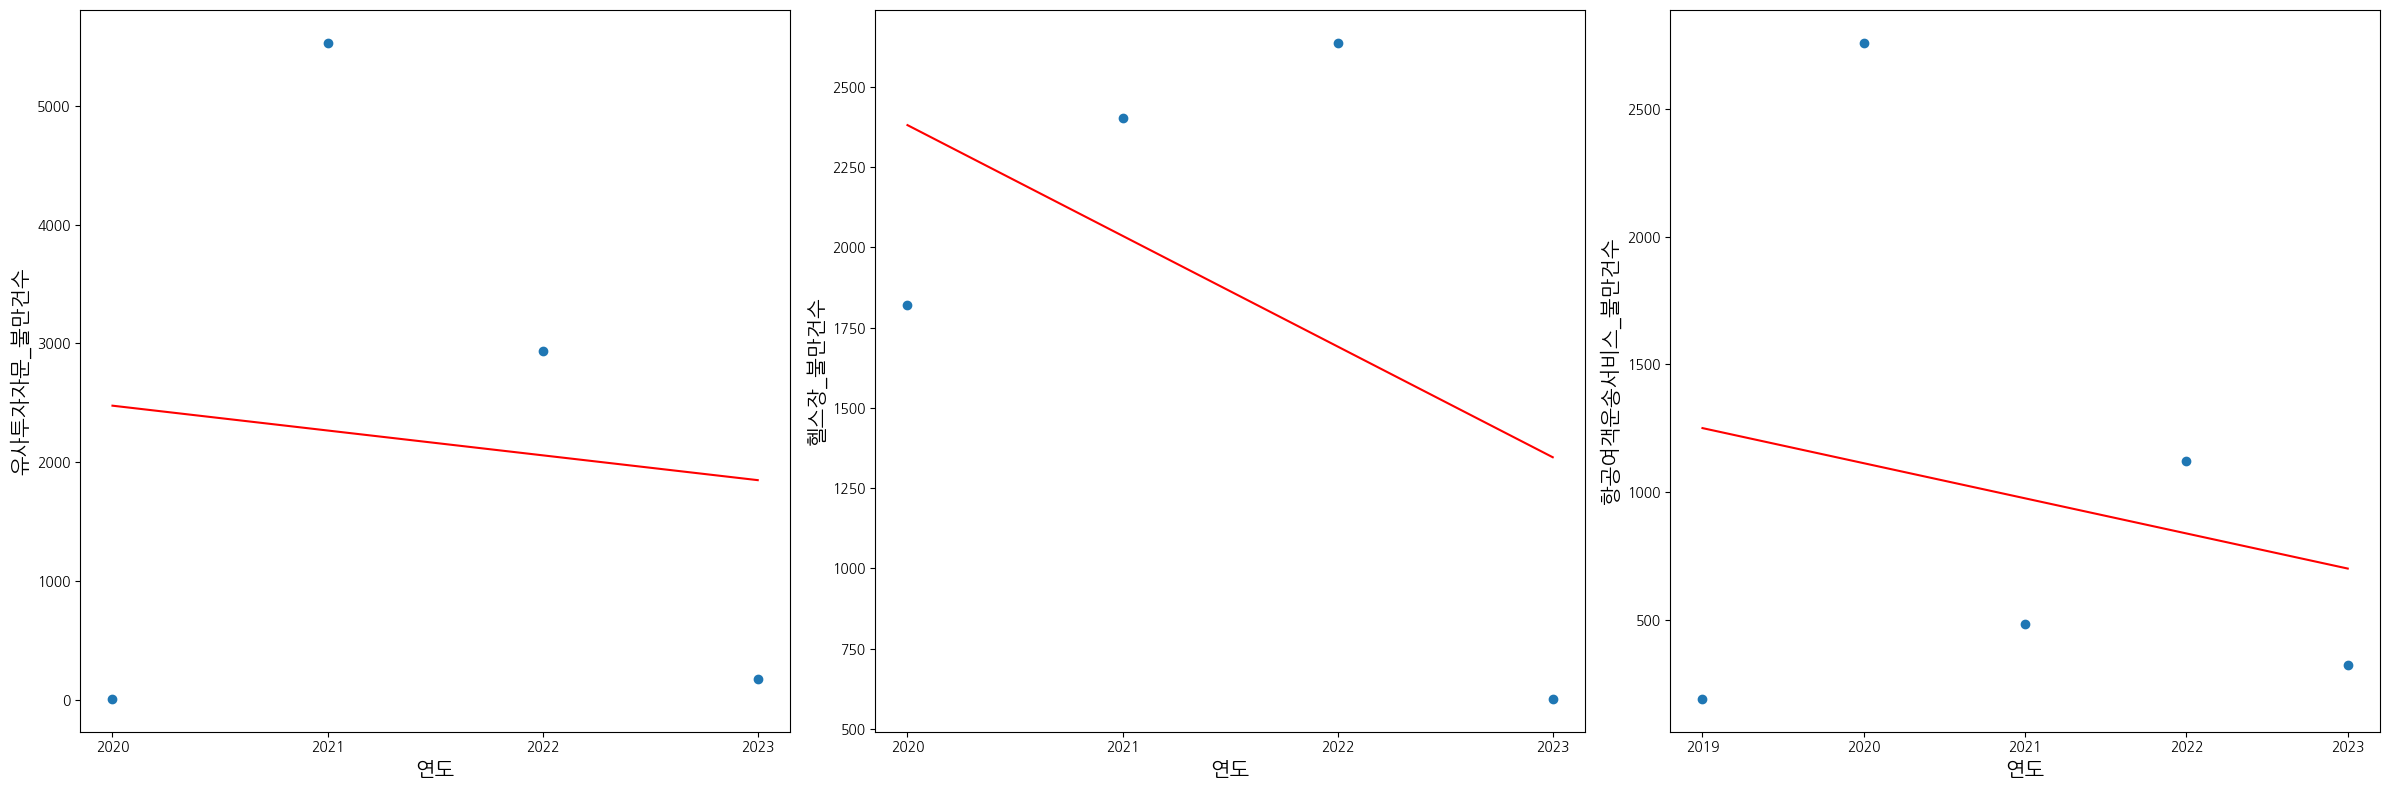

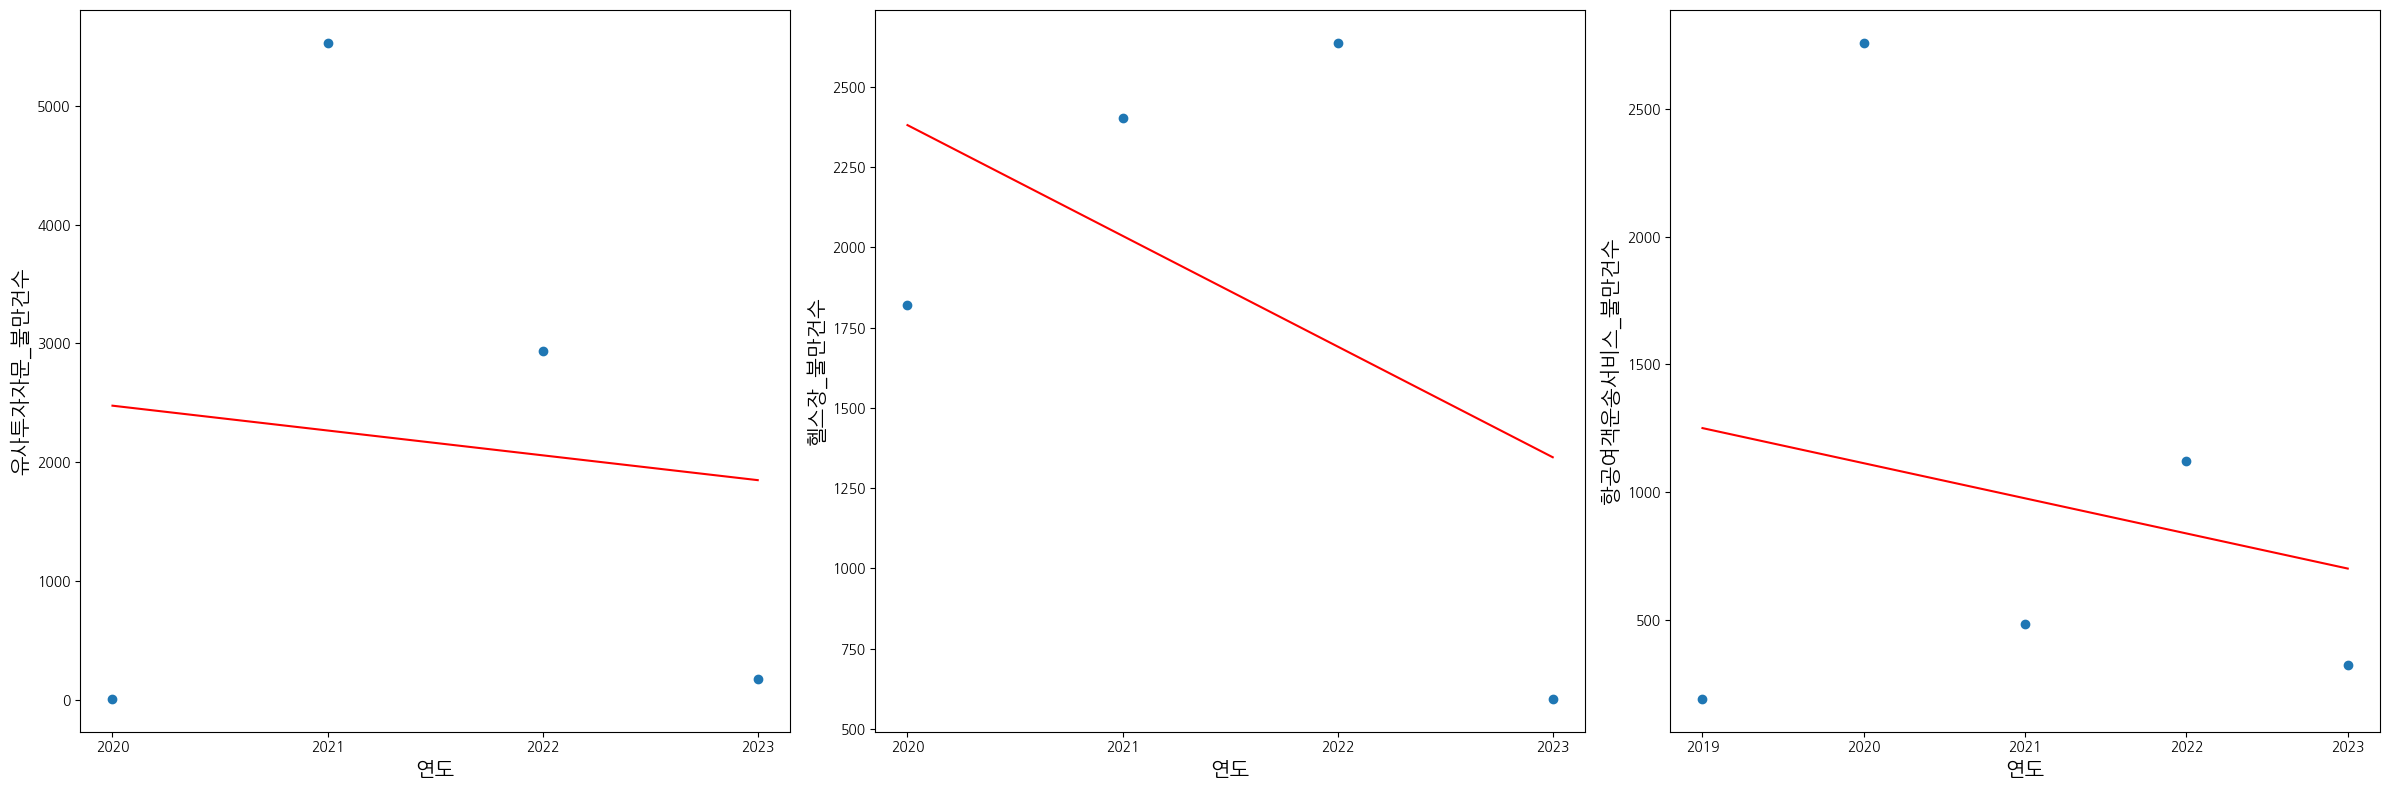

In [80]:
# 데이터와 회귀모델의 예측값
data_frames = [df1, df2, df3]
fit_models = [fit1, fit2, fit3]
labels = ['유사투자자문_불만건수', '헬스장_불만건수', '항공여객운송서비스_불만건수']

# 서브플롯 설정
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
fig.set_facecolor('white')

font_size = 15

for ax, data_frame, fit_model, label in zip(axes, data_frames, fit_models, labels):
    ax.scatter(data_frame['연도'], data_frame[label])
    ax.plot(data_frame['연도'], fit_model.predict(data_frame), color='red')

    ax.set_xlabel('연도', fontsize=font_size)
    ax.set_ylabel(label, fontsize=font_size)
    ax.set_xticks(data_frame['연도'])
    ax.set_xticklabels(data_frame['연도'].astype(int))

plt.tight_layout()
plt.show()